# DataCamp Certification Case Study

## Problem Statement

Congratulations, you have landed your first job as a data scientist at National Accessibility! National Accessibility currently installs wheelchair ramps for office buildings and schools. However, the marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed. 

The marketing manager would like to know whether you can develop a model to predict whether an event venue has a wheelchair ramp. To help you with this, he has provided you with a dataset of London venues. This data includes whether the venue has a ramp.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. Therefore, it is especially important to exclude locations that already have a ramp. Ideally, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 

You will need to present your findings in two formats:
- First, you will need to present your findings to the marketing manager via a 10 minute oral presentation. The owner has no technical data science background. 
- You will also need to submit a technical report to your manager, who does have a strong technical data science background.

The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

## Load Data

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from statistics import mean

plt.style.use('seaborn')
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("data/event_venues.csv")
df.head(10)

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
5,kimpton fitzroy london,True,1,True,False,6.000000,0,112.715867,True,False
6,lloyds avenue,False,0,True,False,35.045455,0,112.715867,False,False
7,public space | members-style bar & dining,True,1,True,False,35.045455,200,112.715867,False,False
8,16 old queen street,False,0,True,False,35.045455,0,112.715867,False,False
9,siorai bar,True,1,True,False,35.045455,180,20.000000,True,False


In [3]:
# No missing value
df.isnull().sum()

venue_name                    0
Loud music / events           0
Venue provides alcohol        0
Wi-Fi                         0
supervenue                    0
U-Shaped_max                  0
max_standing                  0
Theatre_max                   0
Promoted / ticketed events    0
Wheelchair accessible         0
dtype: int64

In [4]:
df['venue_name'] = df['venue_name'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   venue_name                  3910 non-null   category
 1   Loud music / events         3910 non-null   bool    
 2   Venue provides alcohol      3910 non-null   int64   
 3   Wi-Fi                       3910 non-null   bool    
 4   supervenue                  3910 non-null   bool    
 5   U-Shaped_max                3910 non-null   float64 
 6   max_standing                3910 non-null   int64   
 7   Theatre_max                 3910 non-null   float64 
 8   Promoted / ticketed events  3910 non-null   bool    
 9   Wheelchair accessible       3910 non-null   bool    
dtypes: bool(5), category(1), float64(2), int64(2)
memory usage: 192.6 KB


In [5]:
len(df)

3910

First before we perform anything let's split our data for training and testing, we will leave the testing data alone until the very end once we've determined a model we think is best. This prevent overfitting to the test data and provides a non bias overview of our model generalization capability.

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 0)

In [7]:
target = 'Wheelchair accessible'

## EDA

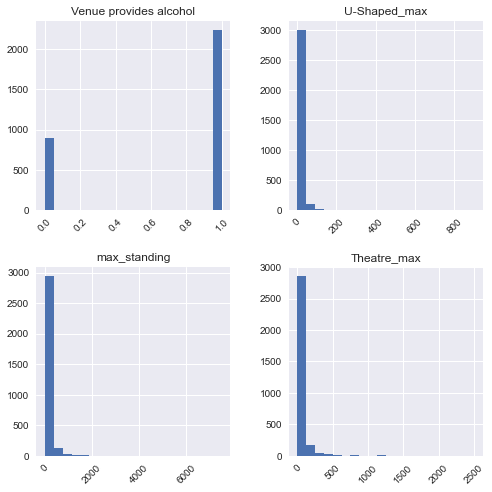

In [8]:
# First lets try to spot any potential outliers in our numerical data using histogram and summary statistics.
df_train.hist(figsize=(8,8), xrot=45, bins=20)
plt.show()

In [9]:
df_train.describe()

,Venue provides alcohol,U-Shaped_max,max_standing,Theatre_max
count,3128.000000,3128.000000,3128.000000,3128.000000
mean,0.715473,34.469905,111.485934,111.876338
std,0.451261,20.041665,249.709427,119.055118
min,0.000000,2.000000,0.000000,2.000000
25%,0.000000,35.045455,0.000000,80.000000
50%,1.000000,35.045455,50.000000,112.715867
75%,1.000000,35.045455,120.000000,112.715867
max,1.000000,900.000000,7500.000000,2500.000000


Looking at the summary statistics we can see that the distributions in `u-Shaped_max`, `max_standing`, and `Theatre_max` are quite large. This could be some consideration whether or not we should perform feature scaling. Furthermore the maximum value of the feature are really far out from the mean which could suggest outliers. However, to be able to say that it is an outlier require us to have a good understanding at the source of our data. For this case I would say that these are not as it make sense that there are some amount of venue which have a total capacity far larger from the rest.

### Imbalance Class?

<AxesSubplot:xlabel='Wheelchair accessible', ylabel='count'>

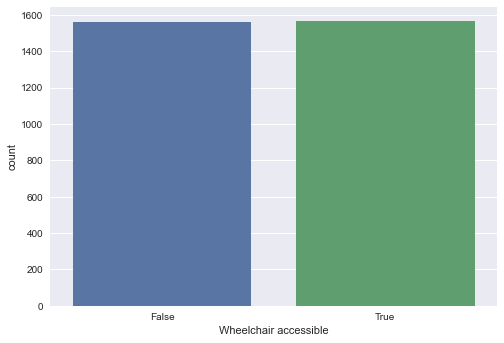

In [10]:
# Let's check if there is any imbalances in our target variable
sns.countplot(x = target, data = df_train)

We can see that the number of venue accessible to wheelchair and those that are not are pretty balance so we don't have to perform any resampling.

### Segment and group by the target feature

In [11]:
df_train[target] = df_train[target].astype('category')

<ipython-input-11-badd2281d496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[target] = df_train[target].astype('category')


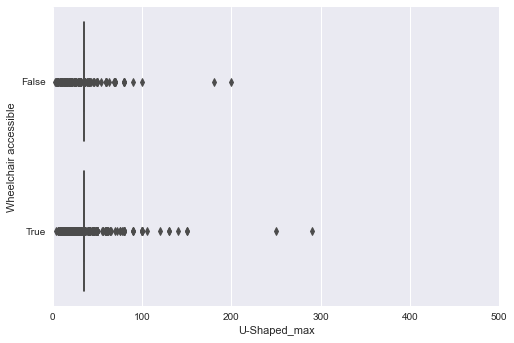

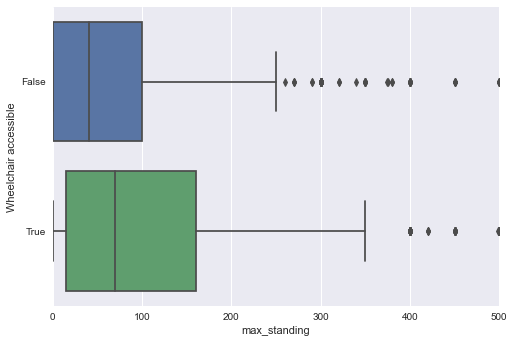

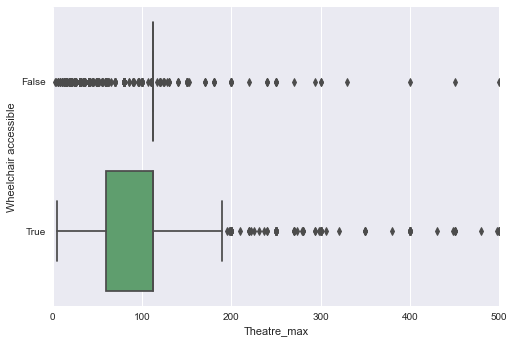

In [12]:
num_cols = ['U-Shaped_max', 'max_standing', 'Theatre_max']
for col in num_cols:
    ax = sns.boxplot(y = target, x = col, data=df_train)
    ax.set_xlim(0,500)
    plt.show()

From the box plot we can see that there are a lot of so called `outlier` in our numerical features and also the distribution for `Theatre_max` and `U-shaped_max` are really dispersed. But more importantly in a glance we can see that a larger proportion of venue who have larger max and standing capacity tends to be Wheelchair accessible. Keeping these in mind these 2 features might be important in us predicting venue with wheelchair accessibility.

### Segment Categorical features by the target classes

In [13]:
categorical = ['Venue provides alcohol', 'Loud music / events', 'Wi-Fi', 'supervenue', 'Promoted / ticketed events']

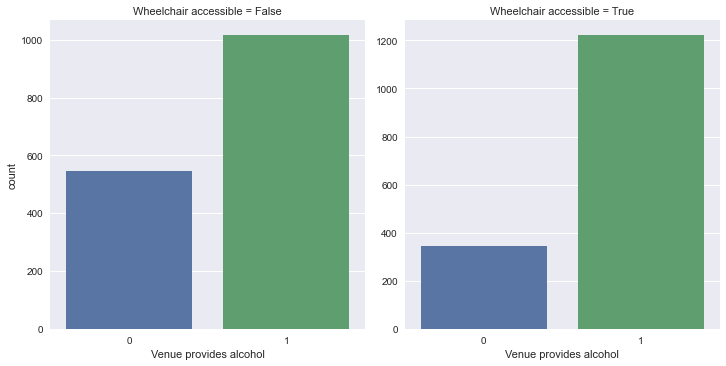

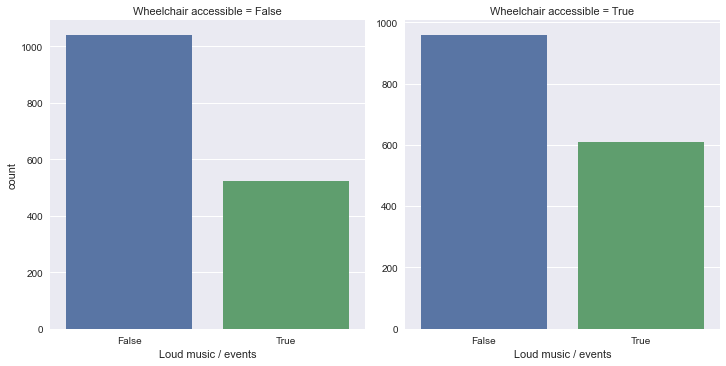

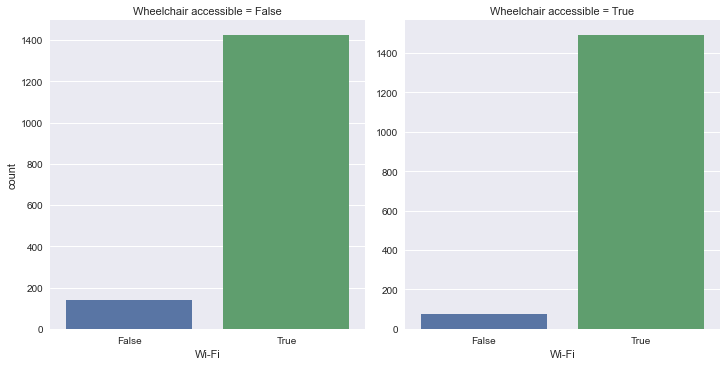

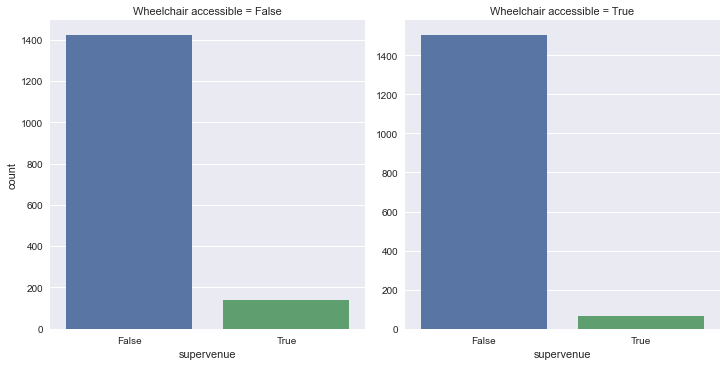

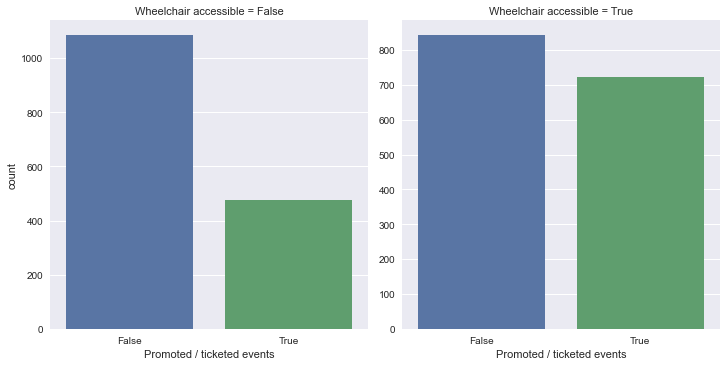

In [14]:
for col in categorical:
        g = sns.catplot(x = col, kind='count', col = target, data=df_train, sharey=False)

We can see that there are some difference in how the target variable is distributed in venue that provides `alcohol` and venue that hosts `promoted/ticketed events`. We see that in venue that hosts `promoted/ticketed` events tend to be wheelchair accesible, while venue that doesn't provide alcohol tend to be non accessible to wheelchair. This shows that these features might be a good indicator of the target.

### Correlation Matrix

<ipython-input-15-e770310b8beb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[target] = df_train[target].astype('bool')


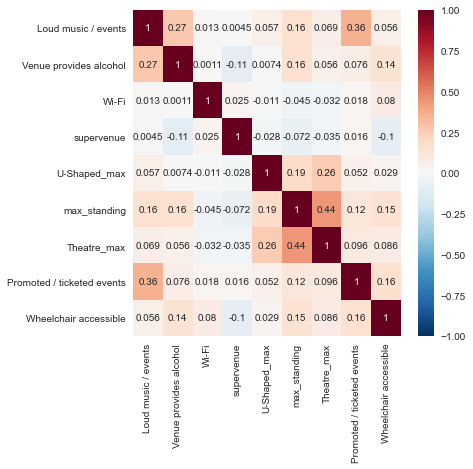

In [15]:
df_train[target] = df_train[target].astype('bool')
corr = df_train.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

From the correlation matrix we can see that there isn't any strong positive or negative linear correlation between the features and our target variable `Wheelchair accesible`.

## Feature Pre-Processing

In [16]:
df_train.dtypes

venue_name                    category
Loud music / events               bool
Venue provides alcohol           int64
Wi-Fi                             bool
supervenue                        bool
U-Shaped_max                   float64
max_standing                     int64
Theatre_max                    float64
Promoted / ticketed events        bool
Wheelchair accessible             bool
dtype: object

In [17]:
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
X = df_train.iloc[:, 1:-1]
y = df_train[target].replace({False: 1, True: 0})


You might be wondering why I set the False target variable which indicate venue that is not accesible to wheelchair to `1` instead of `0`. Well the reason is simple if we remember earlier one of the main requirements given by the Sales Manager for this project is to minimize predicting a venue as non-accessible to wheelchair ramp when it is in fact accessible, this means that we want to optimize the precision for when the target variable is False. To do so we need to set our False target variable as the positive variable (denoted as `1`) since Sk-learn can only calculate the precision of the positive class. 

### Scaling

As we've seen from our previous data exploratory analysis we see that the features in our data have varying distributions and even indication of so called "outliers", this might effect the performance of distance based algorithm (KNN, SVM) and gradient descent algorithm (logistic regression). To fix this it is important to scale our data before feeding them to our model, I will try 2 methods of scaling standard scaling: Standard Scaling and MinMaxScaler. Standard scaling will help reduce the importance of outliers by scaling the distribution to an std = 1. MinMaxScaler on the other hand doesn't reduce the important of outliers and are less distruptive to the information of the original data it will scale the data to a default range of 0 - 1.

We will simply try both of these scaling method and see which yields best result on our model.

In [19]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [20]:
X_scale = pd.DataFrame(X_scale, index = X.index, columns = X.columns)
X_scale.head(3)

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events
788,-0.752041,-1.585751,0.270315,-0.263442,0.028722,-0.446534,0.007053,-0.788928
1101,-0.752041,-1.585751,0.270315,-0.263442,-0.223066,-0.326375,-0.687828,-0.788928
519,-0.752041,-1.585751,0.270315,3.795901,0.028722,-0.406481,0.007053,-0.788928


In [21]:
X_scale.describe()

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events
count,3.128000e+03,3.128000e+03,3.128000e+03,3.128000e+03,3.128000e+03,3.128000e+03,3.128000e+03,3.128000e+03
mean,-2.661980e-17,-1.171271e-18,-3.510264e-17,-2.413528e-16,-1.001900e-15,-2.259488e-16,-1.323450e-15,1.426821e-17
std,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00
min,-7.520409e-01,-1.585751e+00,-3.699385e+00,-2.634420e-01,-1.620379e+00,-4.465340e-01,-9.230507e-01,-7.889275e-01
25%,-7.520409e-01,-1.585751e+00,2.703152e-01,-2.634420e-01,2.872223e-02,-4.465340e-01,-2.677872e-01,-7.889275e-01
50%,-7.520409e-01,6.306160e-01,2.703152e-01,-2.634420e-01,2.872223e-02,-2.462693e-01,7.052730e-03,-7.889275e-01
75%,1.329715e+00,6.306160e-01,2.703152e-01,-2.634420e-01,2.872223e-02,3.410135e-02,7.052730e-03,1.267544e+00
max,1.329715e+00,6.306160e-01,2.703152e-01,3.795901e+00,4.319344e+01,2.959318e+01,2.006218e+01,1.267544e+00


In [22]:
X_norm = pd.DataFrame(X_norm, index = X.index, columns = X.columns)
X_norm.head(3)

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events
788,0.0,0.0,1.0,0.0,0.036799,0.000000,0.044322,0.0
1101,0.0,0.0,1.0,0.0,0.031180,0.004000,0.011209,0.0
519,0.0,0.0,1.0,1.0,0.036799,0.001333,0.044322,0.0


In [23]:
X_norm.describe()

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events
count,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000
mean,0.361253,0.715473,0.931905,0.064898,0.036158,0.014865,0.043986,0.383632
std,0.480441,0.451261,0.251948,0.246385,0.022318,0.033295,0.047660,0.486348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.036799,0.000000,0.031225,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.036799,0.006667,0.044322,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.036799,0.016000,0.044322,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Training

### K-Fold Cross Validation 

To evaluate our model performance on our training set we will use K-Fold cross validation more specifically 5-Fold since our data are quite limited. K-Fold validation will allow us to get a fairly accurate overview of our model performance and generalization capability since it trains our model using different part of our data and it works well with small size dataset due to the repeated cross fold validation.

In [24]:
cv = KFold(n_splits = 5, random_state = 0, shuffle=True)

In [25]:
def get_score(model, X, y, metric):
    return cross_val_score(model, X = X, y = y, scoring = metric, cv = cv, n_jobs = -1)

### Logistic Regresssion

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X, y)

logreg_score = mean(get_score(lr, X, y, 'precision'))
print(logreg_score)

c:\Users\David\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6084089246120791


In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_scale, y)

scale_logreg_score = mean(get_score(lr, X_scale, y, 'precision'))
print(scale_logreg_score)

0.6063055862836805


In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_norm, y)

norm_logreg_score = mean(get_score(lr, X_norm, y, 'precision'))
print(norm_logreg_score)

0.6056049667216648


### Decision Tree

In [29]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X, y)

dt_score = mean(get_score(dt, X, y, 'precision'))
print(dt_score)

0.6321141459006742


In [30]:
dt.get_n_leaves(), len(X)

(825, 3128)

In [31]:
# let's add some contrain to our tree to prevent overfitting
dt = DecisionTreeClassifier(random_state = 0, min_samples_leaf = 25)
dt.fit(X, y)

dt_score = mean(get_score(dt, X, y, 'precision'))
print(dt_score)

0.6282740022143144


In [32]:
dt.get_n_leaves(), len(X)

(83, 3128)

#### Feature Importance
Feature importance will give a good idea of which features are most useful to the tree when splitting the node to get a better perfomance.

In [33]:
def feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [34]:
fi = feat_importance(dt, X)
fi[:10]

,cols,imp
6,Theatre_max,0.528387
5,max_standing,0.241195
7,Promoted / ticketed events,0.070997
1,Venue provides alcohol,0.061862
0,Loud music / events,0.045346
4,U-Shaped_max,0.041549
2,Wi-Fi,0.005378
3,supervenue,0.005286


<AxesSubplot:ylabel='cols'>

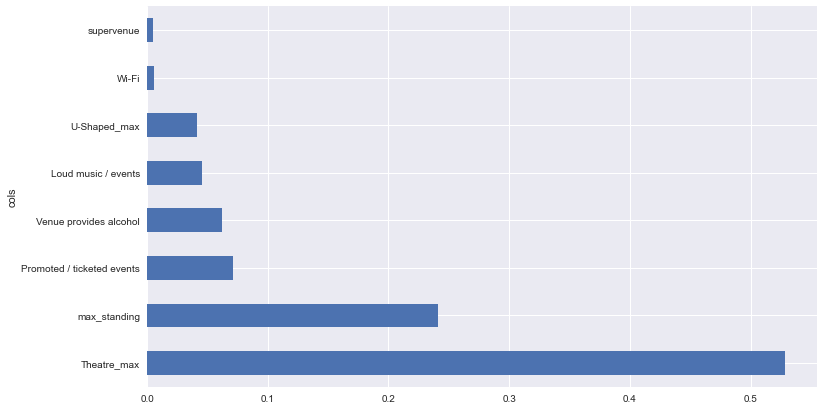

In [35]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi)

In [36]:
# Let's try removing some of these features that have low importance score as they might no be that relevant in our prediction.
to_keep = fi[fi.imp>0.01].cols
X_imp_dt = X[to_keep]

In [38]:
dt_imp = DecisionTreeClassifier(random_state = 0, min_samples_leaf = 25)
dt_imp.fit(X_imp_dt, y)

dt_score = mean(get_score(dt_imp, X_imp_dt, y, 'precision'))
print(dt_score)

0.6281904981143176


In [39]:
fi = feat_importance(dt_imp, X_imp_dt)
fi[:10]

,cols,imp
0,Theatre_max,0.532250
1,max_standing,0.243995
2,Promoted / ticketed events,0.072290
3,Venue provides alcohol,0.062989
4,Loud music / events,0.046171
5,U-Shaped_max,0.042305


### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 0.1, random_state = 0)
rf.fit(X, y)

rf_score = mean(get_score(rf, X, y, 'precision'))
print(rf_score)

0.6546381919484513


In [42]:
rf_fi = feat_importance(rf, X)
rf_fi[:10]

,cols,imp
5,max_standing,0.289665
6,Theatre_max,0.217849
7,Promoted / ticketed events,0.212952
1,Venue provides alcohol,0.174762
4,U-Shaped_max,0.067801
0,Loud music / events,0.036971
2,Wi-Fi,0.000000
3,supervenue,0.000000


Let's remove `Wi-Fi` and `supervenue` since they have no contribution to the random forest.

In [43]:
rf_to_keep = rf_fi[rf_fi.imp>0.05].cols
X_imp_rf = X[rf_to_keep]

In [44]:
rf_imp = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 0.1, random_state = 0)
rf_imp.fit(X_imp_rf, y)

rf_score = mean(get_score(rf_imp, X_imp_rf, y, 'precision'))
print(rf_score)

0.6496156104808377


In [45]:
rf_fi = feat_importance(rf_imp, X_imp_rf)
rf_fi[:10]

,cols,imp
0,max_standing,0.342606
1,Theatre_max,0.287633
2,Promoted / ticketed events,0.203867
3,Venue provides alcohol,0.136621
4,U-Shaped_max,0.029273


### Boosting

In [46]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 400, random_state = 0)

ab_score = mean(get_score(adb, X, y, 'precision'))
print(ab_score)

0.6279814689432012


In [47]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 400, random_state = 0)

gb_score = mean(get_score(gbc, X, y, 'precision'))
print(gb_score)

0.638820254532681


In [48]:
# Schochastic Gradient Boosting
sgb = GradientBoostingClassifier(n_estimators = 400, subsample = 0.8, max_features = 0.2, random_state = 0)
sgb.fit(X, y)

sgb_score = mean(get_score(sgb, X, y, 'precision'))
print(sgb_score)

0.6410017296544348


In [49]:
fi = feat_importance(sgb, X)
fi[:10]

,cols,imp
6,Theatre_max,0.329313
5,max_standing,0.257683
4,U-Shaped_max,0.164669
7,Promoted / ticketed events,0.083803
1,Venue provides alcohol,0.065942
3,supervenue,0.036859
2,Wi-Fi,0.033934
0,Loud music / events,0.027796


It seems that all of the features are relevant when using gradient boosting so we won't remove any feature like we did in our decision tree and random forest classifier as it will only lower the performance

### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn_score = mean(get_score(knn, X, y, 'precision'))
print(knn_score)

0.6198340928379169


In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

scale_knn_score = mean(get_score(knn, X_scale, y, 'precision'))
print(scale_knn_score)

0.6327969183534807


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

norm_knn_score = mean(get_score(knn, X_norm, y, 'precision'))
print(norm_knn_score)

0.6317485643334988


### SVM

In [53]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(random_state = 0)

svc_score = mean(get_score(svc, X, y, 'precision'))
print(svc_score)

0.6269802103034781


In [54]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(random_state = 0)

scale_svc_score = mean(get_score(svc, X_scale, y, 'precision'))
print(scale_svc_score)

0.6180157484965274


In [55]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(random_state = 0)

norm_svc_score = mean(get_score(svc, X_norm, y, 'precision'))
print(norm_svc_score)

0.6227870276502987


In [56]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 
              'Ada Boost', 'Gradient Boosting', 'Stochastic Gradient Boosting', 
              'Scaled KNN', 'SVM'],
    'Precision Score': [logreg_score, dt_score , rf_score, 
              ab_score, gb_score, sgb_score, 
              scale_knn_score, svc_score]})
models.sort_values(by='Precision Score', ascending=False)

,Model,Precision Score
2,Random Forest,0.649616
5,Stochastic Gradient Boosting,0.641002
4,Gradient Boosting,0.638820
6,Scaled KNN,0.632797
1,Decision Tree,0.628190
3,Ada Boost,0.627981
7,SVM,0.626980
0,Logistic Regression,0.608409


Based on the comparisons we can find that tree based models like Random Forest and Gradient Boosing yields the highest precision score. Now let's take two of our best model and try to optimize them with some hyperparameter tuning.

## Hyperparameter Tuning.

Since this is a fairly small dataset we won't be using any advanced informed search algorithm like bayesian optimizaiton or genetic algorithm. We'll simply be using the trusty old GridSearch and RandomSearch.  

In [57]:
# Import the necessary module.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

### Random Forest

Random forest are extremely resilient to hyperparameter choices and should not overfit even with large number of tree as they are independent from one another. To tune the model I first perform Randomized Search CV to get an estimation of the optimal hyperparameters, then I narrow down the range of values for each hyperparameters and perform a Grid Search CV.

In [134]:
rs_param_grid = {
    "n_estimators": list((range(300, 500))),
    "max_depth": list((range(4, 20, 2))),
    "min_samples_leaf": list((range(4, 16, 2))),
    "min_samples_split": list((range(10, 50, 5))),
    "max_features": ['auto', 'sqrt']
}

rf = RandomForestClassifier(random_state = 0)

rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rs_param_grid,
    cv=cv,  # Number of folds
    n_iter=100,  # Number of parameter candidate settings to sample
    verbose=0,  # The higher this is, the more messages are outputed
    scoring="precision",  # Metric to evaluate performance
    random_state=0,
    n_jobs= -1
)

rf_rs.fit(X, y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 6, 8, 10, 12, 14, 16,
                                                      18],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8, 10, 12,
                                                             14],
                                        'min_samples_split': [10, 15, 20, 25,
                                                              30, 35, 40, 45],
                                        'n_estimators': [300, 301, 302, 303,
                                                         304, 305, 306, 307,
                                                         308, 309, 310, 311,
                                                         312, 313, 314, 31

In [139]:
rf_rs.best_params_, rf_rs.best_score_

({'n_estimators': 303,
  'min_samples_split': 30,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': 16},
 0.6592529494144459)

In [142]:
rs_param_grid = {
    "n_estimators": list((range(200, 450, 50))),
    "max_depth": list((range(10, 22, 2))),
    "min_samples_leaf": list((range(2, 14, 2))),
    "min_samples_split": list((range(10, 50, 5))),
    "max_features": ['sqrt']
}

rf = RandomForestClassifier(random_state = 0)

rf_rs = GridSearchCV(
    estimator=rf,
    param_grid=rs_param_grid,
    cv=cv,  # Number of folds 
    verbose=0,  # The higher this is, the more messages are outputed
    scoring="precision",  # Metric to evaluate performance
    n_jobs= -1
)

rf_rs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [10, 15, 20, 25, 30, 35, 40, 45],
                         'n_estimators': [200, 250, 300, 350, 400]},
             scoring='precision')

In [143]:
rf_rs.best_params_, rf_rs.best_score_

({'max_depth': 16,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 25,
  'n_estimators': 300},
 0.6656854437117669)

In [69]:
rf_tuned = RandomForestClassifier(n_estimators= 300, min_samples_split= 25, min_samples_leaf = 2, max_features= 'sqrt', max_depth= 16, random_state=0)
rf_tuned.fit(X, y)

rf_prec_score = mean(get_score(rf_tuned, X, y, 'precision'))
rf_acc_score = mean(get_score(rf_tuned, X, y, 'accuracy'))
print("Precision: {}, Accuracy: {}".format(rf_prec_score, rf_acc_score))

Precision: 0.6656854437117667, Accuracy: 0.6704030670926517


In [59]:
rf_fi = feat_importance(rf_tuned, X)
rf_fi[:10]

,cols,imp
6,Theatre_max,0.337579
5,max_standing,0.302497
4,U-Shaped_max,0.137787
7,Promoted / ticketed events,0.072131
1,Venue provides alcohol,0.061466
0,Loud music / events,0.030885
3,supervenue,0.029704
2,Wi-Fi,0.027951


<AxesSubplot:ylabel='cols'>

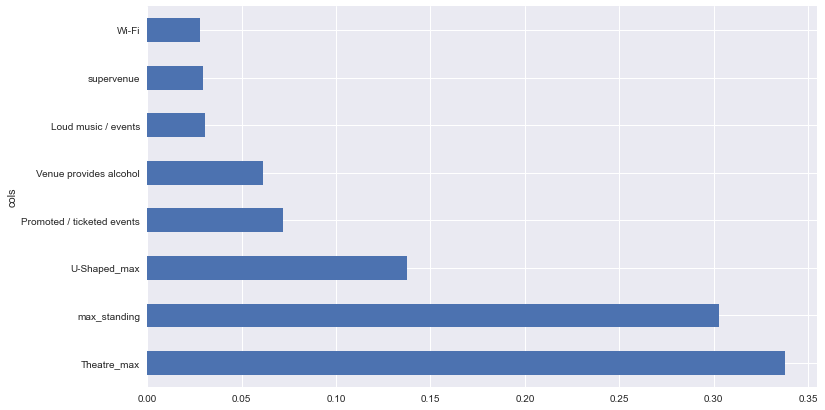

In [65]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(rf_fi)

###  Stochastic Gradient Boosting

Performing optimization to SGB model are trickier compared to random forest model, they are extremely sensitive to the choice of hyperparameters and there's nothing stopping us from overfitting as we increase the number of tree. The following steps are based on this useful [article](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) which give a comprehensive guide to tuning a Gradient Boosting model.

In [ ]:
param_test1 = {'n_estimators':range(10,110,10)}
sgb = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=30, min_samples_leaf=4, max_depth=8, max_features='sqrt', subsample=0.8, random_state=0)
gsearch1 = GridSearchCV(estimator = sgb , param_grid = param_test1, scoring='precision', n_jobs=-1, cv=cv)
gsearch1.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=4,
                                                  min_samples_split=30,
                                                  random_state=0,
                                                  subsample=0.8),
             n_jobs=-1, param_grid={'n_estimators': range(20, 110, 10)},
             scoring='precision')

In [ ]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.12240252, 0.18079839, 0.22800064, 0.29360037, 0.31699891,
         0.42240057, 0.47680054, 0.53859844, 0.50699825]),
  'std_fit_time': array([0.00831587, 0.00875006, 0.00384716, 0.02402232, 0.02019837,
         0.02303587, 0.01146052, 0.02033394, 0.03014674]),
  'mean_score_time': array([0.02039647, 0.00740061, 0.00860014, 0.0087996 , 0.0084013 ,
         0.00959821, 0.00859933, 0.00939989, 0.0066009 ]),
  'std_score_time': array([0.01032626, 0.00135684, 0.00206077, 0.00222705, 0.00102076,
         0.00320091, 0.0008004 , 0.00101937, 0.00101976]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80, 90, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators

In [ ]:
param_test2 = {'max_depth':range(4,14,2), 'min_samples_split':range(5, 35, 5)}
sgb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=0)
gsearch2 = GridSearchCV(estimator = sgb, param_grid = param_test2, scoring='precision', n_jobs=-1, cv=cv)
gsearch2.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=80,
                                                  random_state=0,
                                                  subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(4, 14, 2),
                         'min_samples_split': range(5, 35, 5)},
             scoring='precision')

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 10, 'min_samples_split': 20}, 0.6539445149040549)

In [ ]:
param_test3 = {'max_depth':range(6,16,2), 'min_samples_split':range(5, 35, 5), 'min_samples_leaf':range(2, 20, 2)}
sgb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=0)
gsearch3 = GridSearchCV(estimator = sgb, param_grid = param_test3, scoring='precision', n_jobs=-1, cv=cv)
gsearch3.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=80,
                                                  random_state=0,
                                                  subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(6, 16, 2),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(5, 35, 5)},
             scoring='precision')

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

({'max_depth': 14, 'min_samples_leaf': 18, 'min_samples_split': 5},
 0.6587001254347038)

In [ ]:
param_test4 = {"max_features": range(1, 9, 1)}
sgb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth=14, min_samples_leaf=18, min_samples_split=5, subsample=0.8, random_state=0)
gsearch4 = GridSearchCV(estimator = sgb, param_grid = param_test4, scoring='precision', n_jobs=-1, cv=cv)
gsearch4.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(max_depth=14,
                                                  min_samples_leaf=18,
                                                  min_samples_split=5,
                                                  n_estimators=80,
                                                  random_state=0,
                                                  subsample=0.8),
             n_jobs=-1, param_grid={'max_features': range(1, 9)},
             scoring='precision')

In [ ]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 2}, 0.6587001254347038)

In [ ]:
param_test5 = {"subsample": np.arange(0.6, 0.9, 0.05)}
sgb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth=14, min_samples_leaf=18, min_samples_split=5, max_features = 2, random_state=0)
gsearch5 = GridSearchCV(estimator = sgb, param_grid = param_test5, scoring='precision', n_jobs=-1, cv=cv)
gsearch5.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(max_depth=14, max_features=2,
                                                  min_samples_leaf=18,
                                                  min_samples_split=5,
                                                  n_estimators=80,
                                                  random_state=0),
             n_jobs=-1,
             param_grid={'subsample': array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ])},
             scoring='precision')

In [ ]:
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.8000000000000002}, 0.6587001254347038)

In [71]:
sgb_tuned = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth=14, min_samples_leaf=18, min_samples_split=5, max_features = 2, subsample=0.8, random_state=0)
sgb_tuned.fit(X, y)

sgb_prec_score = mean(get_score(sgb_tuned, X, y, 'precision'))
sgb_acc_score = mean(get_score(sgb_tuned, X, y, 'accuracy'))
print("Precision: {}, Accuracy: {}".format(sgb_prec_score, sgb_acc_score))

Precision: 0.6587001254347037, Accuracy: 0.669128178913738


In [61]:
sgb_fi = feat_importance(sgb_tuned, X)
sgb_fi[:10]

,cols,imp
5,max_standing,0.329886
6,Theatre_max,0.321755
4,U-Shaped_max,0.155595
7,Promoted / ticketed events,0.066759
1,Venue provides alcohol,0.049638
0,Loud music / events,0.032210
2,Wi-Fi,0.024035
3,supervenue,0.020122


<AxesSubplot:ylabel='cols'>

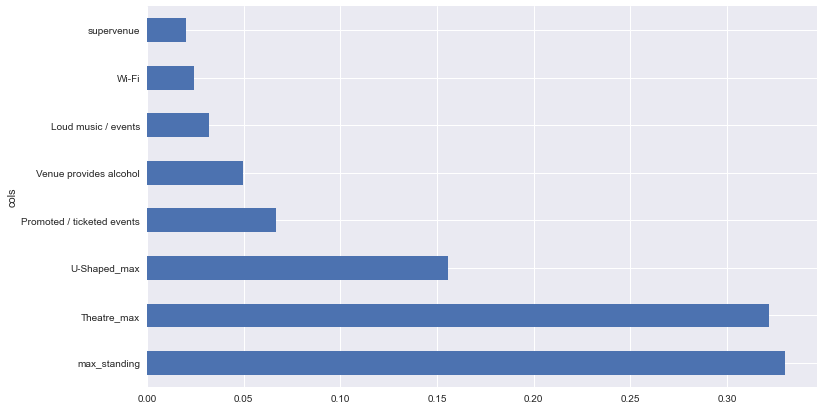

In [62]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(sgb_fi)

In [73]:
result = pd.DataFrame({
    'Model': ['Fine-tuned Random Forest', 'Fine-tuned Stochastic Gradient Boosting'],
    'Precision Score': [rf_prec_score, sgb_prec_score],
    'Accuracy': [rf_acc_score,sgb_acc_score]})
    
result

,Model,Precision Score,Accuracy
0,Fine-tuned Random Forest,0.665685,0.670403
1,Fine-tuned Stochastic Gradient Boosting,0.658700,0.669128


It seems that the Random Forest model yields the highest precision and accuracy score so let's pick that as our final model.

## Final Evaluation
For the final evaluation we will use our fine-tuned Random Forest model to predict the test set we've set aside.

In [ ]:
df_test.head(5)

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
3538,the great hall and chambers leyton,False,1,False,False,35.045455,80,112.715867,False,True
192,dock street studios,True,0,False,False,35.045455,15,112.715867,False,False
2065,clayton crown hotel,False,1,True,False,80.000000,380,400.000000,False,True
2490,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,True
598,the long acre,True,1,True,False,35.045455,200,112.715867,False,False


In [75]:
X_test = df_test.iloc[:, 1:-1]
y_test = df_test[target].replace({False: 1, True: 0})

In [79]:
# Predict our test set using our trained Random Forest model.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

rf_tuned = RandomForestClassifier(n_estimators= 300, min_samples_split= 25, min_samples_leaf = 2, max_features= 'sqrt', max_depth= 16, random_state=0)
rf_tuned.fit(X, y)

y_pred = rf_tuned.predict(X_test)
print("Precision:", precision_score(y_test, y_pred), ", Accuracy:", accuracy_score(y_test, y_pred))

Precision: 0.6577669902912622 , Accuracy: 0.6636828644501279


As we can see the model achieve a pretty good performance on the test set with only a slight decrease from the training which is to be expected. This means that our model is able to generalize well in data it has not seen before. We are also able to achieve a precision of around 66% which satisfied one of this project initial requirement (ideally two-thirds of venues predicted to be without a ramp should not have a ramp).

## Outcome

- In conclusion we found out that features related to the capacity of the venue like `Theatre_max`, `max_standing`, and `U-Shaped_max` are an important predictor to determining whether a venue is wheelchair accessible, more importantly the larger the capacity the more likely they are to be wheelchair accessible. My hypothesis is that these venue that are larger must've have more budget and funding behind them, as such they are likely to be more well prepared and are able to afford wheelchair ramps to accomodate those with disability. Another feature that are also an important predictor is `promoted/ticketed` events which make sense since venue that host promoted/ticketed event would want to appease to all sort of audience in order to boost their income.

- After trying out different models I found out that decision tree based models works best to create a model that can predict whether or not a venue are wheel chair accessible. I then picked the two highest models - Random Forest and Stochastic Gradient Boosting, and perform hyperparameter tuning. In the end the Random Forest yields the better performance and so I picked it for the final evaluation. After evaluating on the unseen test set the model did a good job and yielded a precision and accuracy score of around 66%, this proves that the model doesn't only have high performance on the dataset it's train on but also on new unseen dataset which simulate real life application. 

- The evaluation on the test set also shows that the model have successfully achieve the ideal requirement of this project which is that ideally two-thirds of the venue predicted to be without a ramp doesn't actually have one.

## Future Works
- It is possible that some feature engineering on features that are related with the capacity of the venue like `Theatre_max`, `max_standing`, and `U-Shaped_max` might improve the performance of gradient descent based model (Logistic Regression) and distance based model (KNN) as they might be affected by multicollinearity.